# Loan Status Prediction

## Einleitung

Die Vorhersage des Kreditstatus ist ein wesentlicher Bestandteil des Risikomanagements im Bankwesen. Ein zuverlässiges Modell zur Vorhersage, ob ein Kredit genehmigt wird oder nicht, kann Banken und Finanzinstituten dabei helfen, fundierte Entscheidungen zu treffen und potenzielle Verluste zu minimieren. In diesem Projekt nutzen wir maschinelles Lernen, um ein Modell zu entwickeln, das den Kreditstatus basierend auf historischen Daten und verschiedenen Merkmalen vorhersagt.

Wir verwenden einen Datensatz, der verschiedene Attribute enthält, darunter persönliche Informationen über die Kreditnehmer sowie Details zu den beantragten Krediten. Durch die Analyse und das Training unseres Modells mit diesen Daten können wir Muster erkennen und Vorhersagen treffen, die auf zukünftige Kreditentscheidungen angewendet werden können.

Die wichtigsten Schritte in diesem Projekt umfassen die Datenbereinigung, die explorative Datenanalyse (EDA), das Training eines Machine-Learning-Modells und die Evaluierung der Modellleistung.


### Libaries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import joblib

### Data Collection and Processing

In [74]:
df = pd.read_csv('loan_data.csv')

In [75]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [76]:
df.shape

(614, 13)

In [77]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [79]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
df.dropna(inplace = True)

In [81]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [82]:
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

In [83]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [84]:
df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [85]:
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 4})

In [86]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [87]:
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

### Data Visualisation

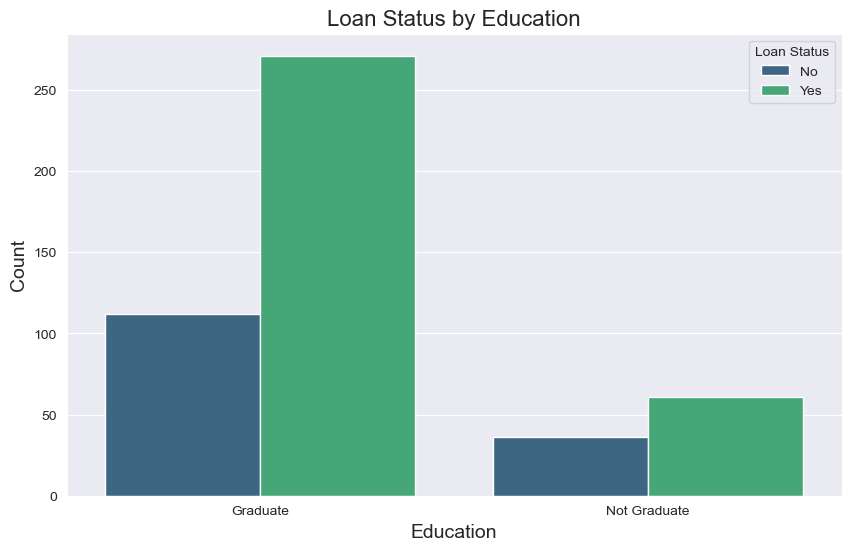

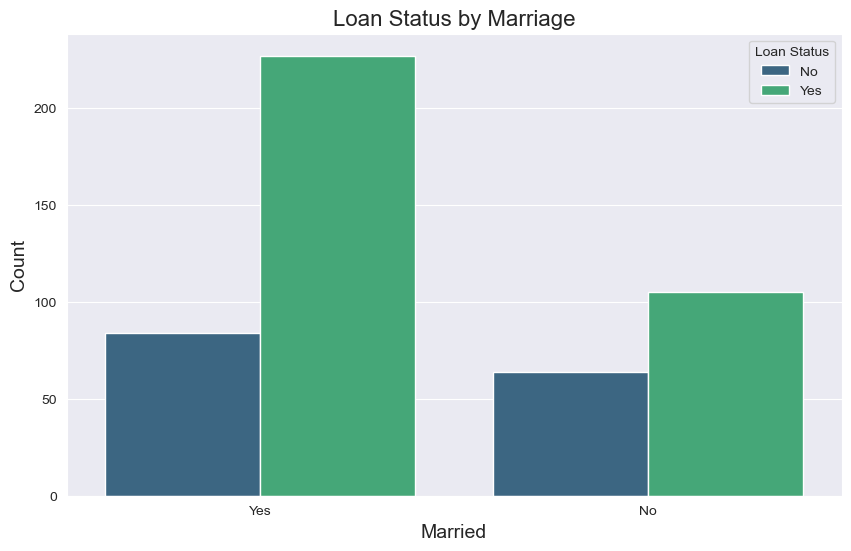

In [88]:
palette = sns.color_palette("viridis", 2)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', hue='Loan_Status', palette=palette)
plt.title('Loan Status by Education', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Loan Status', labels=['No', 'Yes'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Married',hue='Loan_Status',palette=palette)
plt.title('Loan Status by Marriage', fontsize=16)
plt.xlabel('Married', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Loan Status', labels=['No', 'Yes'])
plt.show()

In [89]:
df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})

In [90]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


### Preparing the ML Modell

In [92]:
X = df.drop(columns = ['Loan_ID','Loan_Status'], axis = 1)
y = df['Loan_Status']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2, stratify=y)

In [94]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


### ML Modell - Support Vector Machine

In [95]:
classifier = svm.SVC(kernel = 'linear')

In [96]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [100]:
train_prediction = classifier.predict(X_train)
train_accuaracy = accuracy_score(train_prediction,y_train)
print(f"Accuaracy of Training Data: {train_accuaracy}")

Accuaracy of Training Data: 0.7986111111111112


In [102]:
test_prediction = classifier.predict(X_test)
test_accuaracy = accuracy_score(test_prediction,y_test)
print(f"Accuaracy of Test Data: {test_accuaracy}")

Accuaracy of Test Data: 0.8333333333333334


## Schlussfolgerung

In diesem Projekt haben wir erfolgreich ein Modell zur Vorhersage des Kreditstatus entwickelt. Wir haben den Datensatz sorgfältig vorbereitet, indem wir fehlende Werte entfernt und die Daten in geeignete Formate umgewandelt haben. Mithilfe von Datenvisualisierungen konnten wir wertvolle Einblicke in die Verteilung und Beziehungen der verschiedenen Merkmale gewinnen.

Anschließend haben wir ein Support Vector Machine (SVM) Modell verwendet, um den Kreditstatus vorherzusagen. Die Leistung des Modells wurde sowohl auf dem Trainings- als auch auf dem Testdatensatz evaluiert. Die Ergebnisse zeigen, dass das Modell eine hohe Genauigkeit erzielt und somit ein zuverlässiges Werkzeug für die Kreditstatusvorhersage darstellt.

Diese Analyse demonstriert die Bedeutung von Datenvorverarbeitung und Visualisierung für die Entwicklung effektiver maschineller Lernmodelle. Die Implementierung und Validierung des SVM-Modells hat gezeigt, dass es möglich ist, den Kreditstatus mit hoher Präzision vorherzusagen. Zukünftige Arbeiten könnten darauf abzielen, weitere Modelle zu testen und die Leistung weiter zu optimieren.
ngen.
